In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle 
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [38]:
data=pd.read_csv('Sales Transaction.csv')

In [39]:
data

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12-01-2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12-01-2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12-01-2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12-01-2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [40]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [41]:
data.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12-01-2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12-01-2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12-01-2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12-01-2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12-01-2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [43]:
data.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [44]:
data.size

4290800

In [45]:
data.shape

(536350, 8)

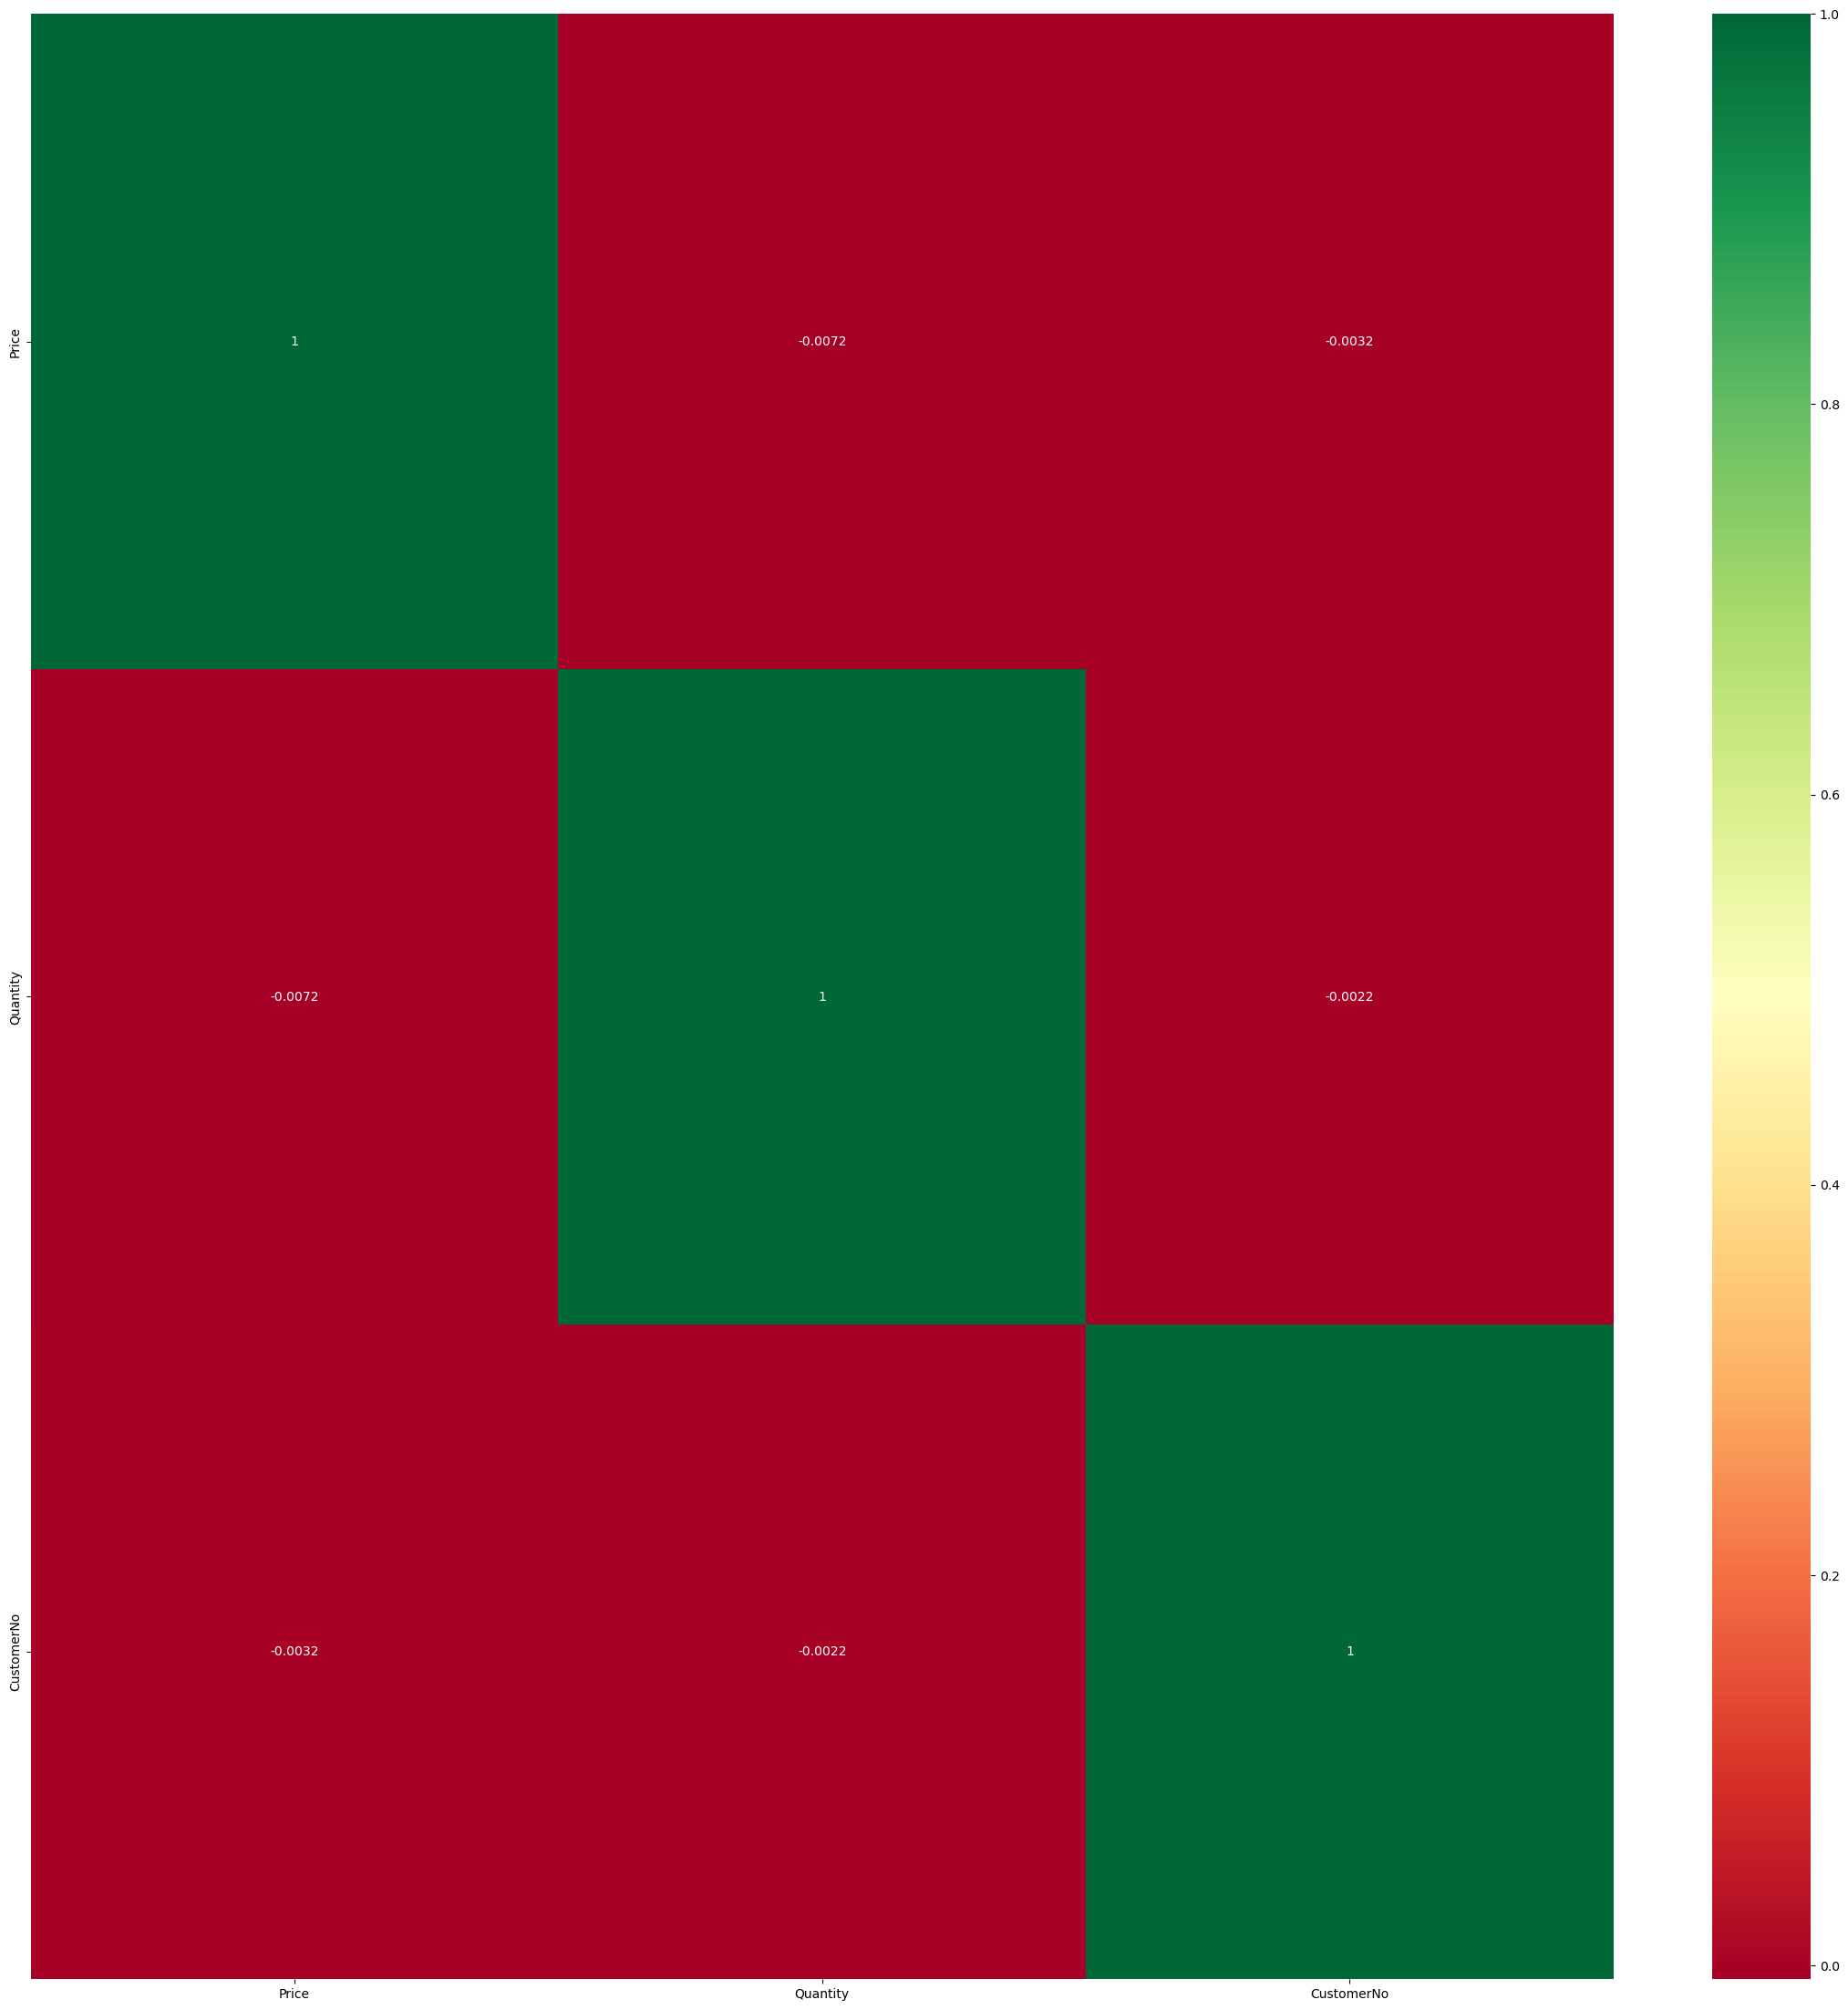

In [46]:
plt.figure(figsize=(28,28))
sns.heatmap(data.select_dtypes(include=['int','float']).corr(),cmap='RdYlGn',annot=True)
plt.show()

In [47]:
np.where(data.select_dtypes(include=['int','float']).corr()>0.9)

(array([0, 1, 2]), array([0, 1, 2]))

In [48]:
data.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [49]:
data[['TransactionNo','Date','ProductNo','ProductName','Price','Quantity','CustomerNo','Country']]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12-01-2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12-01-2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12-01-2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12-01-2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [50]:
data.ProductNo.value_counts()

ProductNo
85123A    2378
22423     2200
85099B    2159
47566     1727
20725     1639
          ... 
84206B       1
90214U       1
84795C       1
17028J       1
20957        1
Name: count, Length: 3768, dtype: int64

In [51]:
data.TransactionNo.value_counts()

TransactionNo
573585     1111
581219      747
581492      730
580729      720
558475      704
           ... 
C544553       1
C544558       1
C544559       1
C544560       1
C571543       1
Name: count, Length: 23204, dtype: int64

In [52]:
len(data.columns)

8

In [53]:
OHE_columns = ['Country']
Label_encoder = ['ProductName']
standard_scaler = ['Price', 'Quantity']
passthrough = []

In [54]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self,y,*args,**kwargs):
        return super().fit_transform(y).reshape(-1,1)
    def transform(self,y,*args,**kwargs):
         return super().transform(y).reshape(-1,1)

In [55]:
def same(x):
    return x

In [56]:
no_trans=FunctionTransformer(same)

In [57]:
preprocessor=ColumnTransformer([
    ('OHE columns',OneHotEncoder(),OHE_columns),
    ('Label_encoder',ModifiedLabelEncoder(),Label_encoder),
    ('Standard_scaler',StandardScaler(),standard_scaler),
    ('Passthrough',no_trans,passthrough)])

In [58]:
preprocessor

,transformers,"[('OHE columns', ...), ('Label_encoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [59]:
data = data.dropna(subset=['CustomerNo'])

In [60]:
data

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12-01-2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12-01-2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12-01-2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12-01-2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [61]:
data = data[data['Quantity'] > 0]
data

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,12-01-2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,12-01-2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,12-01-2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,12-01-2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


In [62]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [63]:
data['Date'].isna().sum()


np.int64(301118)

In [64]:
data['TotalAmount'] = data['Price'] * data['Quantity']
snapshot_date = data['Date'].max() + pd.Timedelta(days=1)

In [65]:
recency = data.groupby('CustomerNo')['Date'].max()
recency = (snapshot_date - recency).dt.days

In [66]:
frequency = data.groupby('CustomerNo')['TransactionNo'].nunique()

In [67]:
monetary = data.groupby('CustomerNo')['TotalAmount'].sum()

In [68]:
aov = monetary / frequency

In [69]:
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary,
    'AOV': aov
})

In [70]:
rfm['LTV'] = rfm['Monetary']

In [71]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalAmount
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
X = rfm[['Recency', 'Frequency', 'AOV']]
y = rfm['LTV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [74]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


In [75]:
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)

Model Performance:
MAE: 1567.4249262711828
RMSE: 16853.793777375184


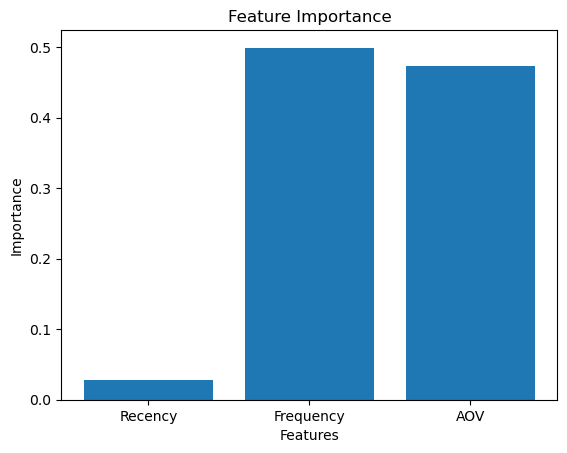

In [77]:
importances = model.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [78]:
rfm['Predicted_LTV'] = model.predict(X)

In [79]:
rfm['Segment'] = pd.qcut(
    rfm['Predicted_LTV'],
    q=3,
    labels=['Low Value', 'Medium Value', 'High Value']
)


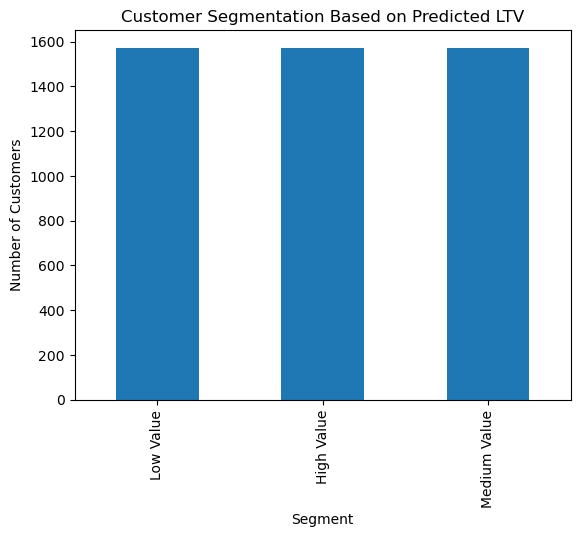

In [80]:
plt.figure()
rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segmentation Based on Predicted LTV")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


In [81]:
rfm.to_csv("Final_LTV_Predictions.csv")
print("Final LTV prediction file saved successfully!")

Final LTV prediction file saved successfully!
